In [1]:
#required imports
import numpy as np
import random as rd
from collections import Counter
import math
from scipy.linalg import toeplitz

In [2]:
#minimum entropy calculation
def min_entropy(data):
    return - np.log2(max(Counter(data).values()) / len(data))

In [3]:
#custom n-value based on requirement
n = 8
s = 10**8

#simulating raw data with custom range in decimal form.
raw_data = []

for i in range(s):
    raw_data.append(rd.randint(0,pow(2,n)-1))
    
print(Counter(raw_data), min_entropy(raw_data), len(raw_data))

Counter({114: 392141, 192: 391980, 223: 391967, 104: 391957, 115: 391847, 70: 391835, 190: 391822, 136: 391782, 171: 391771, 145: 391759, 17: 391737, 221: 391690, 21: 391625, 52: 391612, 131: 391598, 65: 391582, 217: 391574, 48: 391571, 182: 391564, 204: 391561, 228: 391560, 244: 391555, 116: 391539, 119: 391534, 3: 391509, 14: 391498, 28: 391491, 95: 391481, 1: 391479, 252: 391474, 194: 391474, 72: 391455, 63: 391441, 4: 391380, 155: 391365, 9: 391363, 126: 391361, 41: 391287, 59: 391274, 68: 391257, 37: 391255, 165: 391248, 147: 391246, 66: 391241, 203: 391234, 152: 391234, 36: 391230, 93: 391225, 242: 391223, 237: 391217, 222: 391214, 148: 391196, 81: 391176, 24: 391160, 50: 391148, 142: 391146, 10: 391144, 110: 391142, 112: 391135, 16: 391123, 174: 391115, 216: 391104, 15: 391098, 77: 391089, 29: 391086, 168: 391044, 199: 391041, 254: 391039, 212: 391029, 42: 391022, 135: 391012, 102: 391003, 241: 390995, 158: 390990, 5: 390976, 98: 390976, 213: 390971, 106: 390969, 91: 390937, 184

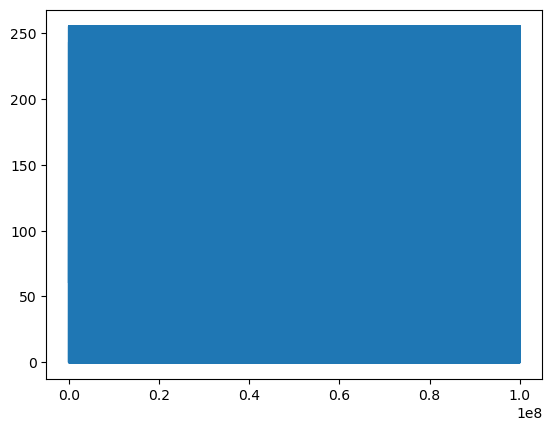

In [4]:
import matplotlib.pyplot as plt

plt.plot(raw_data)

In [5]:
raw_data[:5]

[61, 157, 102, 18, 44]

In [6]:
#Creating the binary equivalent string removing the extra padding bits
binary_key = ''
for i,x in enumerate(raw_data):
    binary_key += str(bin(x)[2:].zfill(n))

In [7]:
'''
Value of m decided based on formula:

        m = k - log2(e)

Where, 
    k - minimum entropy
    e - security parameter

Here,
    We consider m = math.floor(min_entropy)
'''
m = abs(math.floor(min_entropy(raw_data)))
m

7

In [253]:
#Creating pseudo-random equivalent toeplitz matrix array
toep_arr = []
for i in range(n+m):
    toep_arr.append(rd.randint(0,1))

toep_arr[:5], len(toep_arr)

([0, 1, 1, 1, 1], 104)

In [254]:
#Creazting pseudo-random Toeplitz Matrix using toeplitz_array
tpz_mat = toeplitz(toep_arr[m::-1],toep_arr[m:])

np.shape(tpz_mat)

(97, 8)

In [255]:
#Slicing binary_key to n multiple bit string
bit_cnt = len(binary_key) - len(binary_key)%n
bit_cnt

800

In [256]:
print(binary_key, len(binary_key))

11111010101000000100100000001110100110010101010111111101101010010000101001001111010111000101110001010001000100011110001101000101110101111001010001001011101010000100111101111101111101110000111110000000011001110100001000001001010101111110011011011101011000110100111101001100001010000110000010000111100010101111010000001011101110010001010100111101111111101001101001010101000100101111101100100010000000101000011001110011110101100011011101011010011101000001001001010101110011010100110111101101010101010100111010110011000111011111101000001101110001010100000010101010100100000011101110000101110111111101101111011000010101000001111011000001000010110001100001100101110100000111010110110000111110100101111110010000100011110011010101010110110000111101100011001011011001110011111101001101101100011100000011111111 800


In [257]:
concat_bk = binary_key[:bit_cnt]
print(concat_bk, len(concat_bk))

11111010101000000100100000001110100110010101010111111101101010010000101001001111010111000101110001010001000100011110001101000101110101111001010001001011101010000100111101111101111101110000111110000000011001110100001000001001010101111110011011011101011000110100111101001100001010000110000010000111100010101111010000001011101110010001010100111101111111101001101001010101000100101111101100100010000000101000011001110011110101100011011101011010011101000001001001010101110011010100110111101101010101010100111010110011000111011111101000001101110001010100000010101010100100000011101110000101110111111101101111011000010101000001111011000001000010110001100001100101110100000111010110110000111110100101111110010000100011110011010101010110110000111101100011001011011001110011111101001101101100011100000011111111 800


In [258]:
concat_bk_arr = []
for i in range(0,len(concat_bk),n):
    concat_bk_arr.append(concat_bk[i:i+n])
    
concat_bk_arr[:5]

['11111010', '10100000', '01001000', '00001110', '10011001']

In [259]:
bk_arr = []

for i,x in enumerate(concat_bk_arr):
    ls = []
    
    for j,y in enumerate(x):
        ls.append(int(y))
        
    bk_arr.append(ls)


In [260]:
raw_key = np.array(bk_arr)

np.shape(raw_key)

(100, 8)

In [261]:
tpz_mat = tpz_mat.astype('bool')
raw_key = raw_key.astype('bool')
ext_key = np.matmul(tpz_mat,raw_key.T)

In [262]:
ext_key = ext_key.astype('int')
ext_key[:5]

array([[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 0,

In [263]:
ext_key_no = []
for i in range(0,len(ext_key[0])):
    ext_key_no.append(list(ext_key[:,i]))
        
np.shape(ext_key_no)

(100, 97)

In [264]:
final_ext_key = ''
for i in ext_key_no:
    for j in i:
        final_ext_key += str(j)
        
final_ext_key

'111111111011111111111111110111111111111111111111111111111111111111111111111111111111111111111111110101010001010111111010100001010111111111101010010111101111000011111111111101111110111111111111110100110010010111111111110100010011111111101110010101101111011000110111011111111111100111111111111011111101110001111111111111100001110111111111101110011111111111000011111111111101111111111111111111011001101111111111111111101001111111111111011110111111111110111011101111111111111111111111111111111110101010101111111111010110101111111111111101111111111111111111111111111111111111111111111111111111111111111111111111111011111111111111111111111111111111111111111111111111111111111111111111111101011101110111111111111101010111111111111011110111111111110111111111111111111111111111111111110101101010100010101111110101000010101111111111010100101111011110000111111111111011111101111111111011111111111011111111111111111001111111111111111111111111111111111011111111111111111111111111111111111101110101111111111111100

In [265]:
N = 64

count = len(final_ext_key) - len(final_ext_key)%N
len(final_ext_key[:count])

9664

In [266]:
final_ext_key_arr = []
for i in range(0,len(final_ext_key),N):
    final_ext_key_arr.append(final_ext_key[i:i+N])
    
final_ext_key_arr

['1111111110111111111111111101111111111111111111111111111111111111',
 '1111111111111111111111111111111111010101000101011111101010000101',
 '0111111111101010010111101111000011111111111101111110111111111111',
 '1101001100100101111111111101000100111111111011100101011011110110',
 '0011011101111111111110011111111111101111110111000111111111111110',
 '0001110111111111101110011111111111000011111111111101111111111111',
 '1111110110011011111111111111111010011111111111110111101111111111',
 '1011101110111111111111111111111111111111111010101010111111111101',
 '0110101111111111111101111111111111111111111111111111111111111111',
 '1111111111111111111111111111111110111111111111111111111111111111',
 '1111111111111111111111111111111111111111110101110111011111111111',
 '1101010111111111111011110111111111110111111111111111111111111111',
 '1111111101011010101000101011111101010000101011111111110101001011',
 '1101111000011111111111101111110111111111101111111111101111111111',
 '11111110011111111111111111111111

In [267]:
#Integer Binary i/p to Decimal o/p
def bin_to_deci(bin_no):
    x = len(str(bin_no))-1
    deci = 0
    for i in str(bin_no):
        deci += int(i)*pow(2,x)
        x-=1
        
    return deci

In [268]:
deci_ext_key = []
for i in final_ext_key_arr:
    deci_ext_key.append(bin_to_deci(int(i)))
    
deci_ext_key

[18428729537761116159,
 18446744072989571717,
 9217283976546742271,
 15214848190326920950,
 3999189871764471806,
 2161650854317252607,
 18274481382057016319,
 13528813280619573245,
 7782211360003194879,
 18446744072635809791,
 18446744073706895359,
 15420306982040502271,
 18400198170151746891,
 16005791967568985087,
 18338657682651611135,
 18446592340995866359,
 18392700878181087999,
 18212556326144311295,
 18446129858939977703,
 18428729125444044971,
 18251118628811938750,
 17293819270567559163,
 18446744073709476523,
 18399737744006815742,
 18446743523953606654,
 18446744073709543095,
 18398611841348460543,
 18446700015934980095,
 16068834674364906837,
 9198989261494239231,
 18446735275469033471,
 18446741874686296062,
 18446603336221196287,
 18446744065119617023,
 18158513697557839615,
 16717346423634394687,
 18446743559048792315,
 1204010980498947903,
 13835057230640054263,
 18446743891399660831,
 18092848337636028393,
 3629898087006564195,
 8646805731290382295,
 184422404740821811

In [269]:
decimal_str = ''
for i in deci_ext_key:
    decimal_str += str(i)
    
decimal_str

'184287295377611161591844674407298957171792172839765467422711521484819032692095039991898717644718062161650854317252607182744813820570163191352881328061957324577822113600031948791844674407263580979118446744073706895359154203069820405022711840019817015174689116005791967568985087183386576826516111351844659234099586635918392700878181087999182125563261443112951844612985893997770318428729125444044971182511186288119387501729381927056755916318446744073709476523183997377440068157421844674352395360665418446744073709543095183986118413484605431844670001593498009516068834674364906837919898926149423923118446735275469033471184467418746862960621844660333622119628718446744065119617023181585136975578396151671734642363439468718446743559048792315120401098049894790313835057230640054263184467438913996608311809284833763602839336298980870065641958646805731290382295184422404740821811191758205291089310515118446744073575333815184467440737095516141833865766976756121516140760324859494396184467440731726807031314488

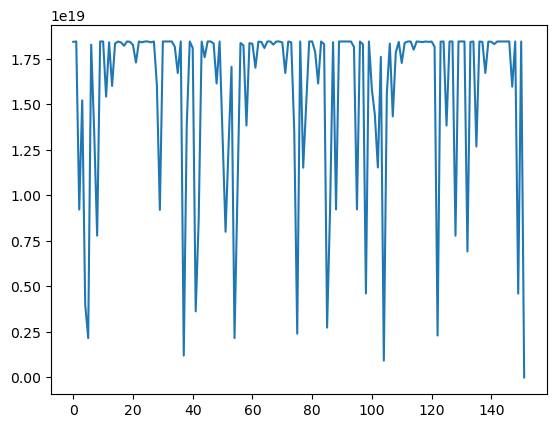

In [270]:
import matplotlib.pyplot as plt

plt.plot(deci_ext_key)